#Introduction To Python For Data Scientists<br>

>Introduction<br>
- Python:- Scripting language.<br>
- Popular; Simplicity and diversity of frameworks. E.g Django, flask, keras, tensorflow, pytorch, etc. <br>

>Learning outcomes<br>
- Exposure to python libraries; numpy, pandas, matplotlib, scikit-learn<br>
- Import, clean and manipulate data (describe, normalize, encode categoricals) <br>
- Visualization<br>
-Simple case study<br>

>Environments<br>
- Jupyter notebooks:   `pip install jupyterlab`
- Google Colab: https://colab.google





## Loading Libraries
>Installation of libraries in local env

In [ ]:
#!pip install numpy pandas matplotlib sklearn

>Importing libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Importing Dataset

>Importing locally provided data in sklearn

In [2]:

# Iris dataset using load_dataset()
from sklearn.datasets import load_iris

iris= load_iris( as_frame = True)

In [ ]:
iris

In [6]:
data = pd.DataFrame(iris.data)
data['Target'] = iris.target

In [7]:
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0

In [8]:
data.shape

(150, 5)

In [9]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Target                 int64
dtype: object

In [10]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [11]:
#viewing data statistics
data.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      Target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

>Importing External Data

In [13]:
# reading csv files
housing  = pd.read_csv('/content/Housing Prices')

In [19]:
housing

Rooms  Distance  Bedroom2  Landsize  Bathroom  Lattitude  Longtitude  \
0          2       2.5       2.0     126.0       1.0  -37.80140   144.99580   
1          2       2.5       2.0     202.0       1.0  -37.79960   144.99840   
2          2       2.5       2.0     156.0       1.0  -37.80790   144.99340   
3          3       2.5       3.0       0.0       2.0  -37.81140   145.01160   
4          3       2.5       3.0     134.0       2.0  -37.80930   144.99440   
...      ...       ...       ...       ...       ...        ...         ...   
34852      4       6.3       4.0     593.0       1.0  -37.81053   144.88467   
34853      2       6.3       2.0      98.0       2.0  -37.81551   144.88826   
34854      2       6.3       2.0     220.0       1.0  -37.82286   144.87856   
34855      3       6.3       NaN       NaN       NaN        NaN         NaN   
34856      2       6.3       2.0     250.0       1.0  -37.81810   144.89351   

                  Regionname      Price  
0      Northern Metropolitan        NaN  
1      Northern Metropolitan  1480000.0  
2      Northern Metropolitan  1035000.0  
3      Northern Metropolitan        NaN  
4      Northern Metropolitan  1465000.0  
...                      ...        ...  
34852   Western Metropolitan  1480000.0  
34853   Western Metropolitan   888000.0  
34854   Western Metropolitan   705000.0  
34855   Western Metropolitan  1140000.0  
34856   Western Metropolitan  1020000.0  

[34857 rows x 9 columns]

In [20]:
housing.shape

(34857, 9)

## Data Preprocessing

>Checking missing values

In [21]:
housing.isnull().sum()

Rooms             0
Distance          1
Bedroom2       8217
Landsize      11810
Bathroom       8226
Lattitude      7976
Longtitude     7976
Regionname        3
Price          7610
dtype: int64

>Handling missing values

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

# specifying columns
s_features = ['Rooms', 'Distance', 'Bedroom2', 'Landsize', 'Bathroom', 'Lattitude', 'Longtitude','Price']
# fit and transform
imputer.fit(housing[s_features])
housing[s_features] = imputer.transform(housing[s_features])

In [23]:
housing.isnull().sum()

Rooms         0
Distance      0
Bedroom2      0
Landsize      0
Bathroom      0
Lattitude     0
Longtitude    0
Regionname    3
Price         0
dtype: int64

>Handling Categorical values

In [24]:
from sklearn.preprocessing import  LabelEncoder

# create LabelEncoder object
l_encoder = LabelEncoder()

#creating copy of housing datafraem
housing_c = housing.copy()

housing_c['Regionname'] = l_encoder.fit_transform(housing_c['Regionname'])


In [25]:
housing_c

Rooms  Distance  Bedroom2    Landsize  Bathroom  Lattitude  Longtitude  \
0        2.0       2.5  2.000000  126.000000  1.000000 -37.801400  144.995800   
1        2.0       2.5  2.000000  202.000000  1.000000 -37.799600  144.998400   
2        2.0       2.5  2.000000  156.000000  1.000000 -37.807900  144.993400   
3        3.0       2.5  3.000000    0.000000  2.000000 -37.811400  145.011600   
4        3.0       2.5  3.000000  134.000000  2.000000 -37.809300  144.994400   
...      ...       ...       ...         ...       ...        ...         ...   
34852    4.0       6.3  4.000000  593.000000  1.000000 -37.810530  144.884670   
34853    2.0       6.3  2.000000   98.000000  2.000000 -37.815510  144.888260   
34854    2.0       6.3  2.000000  220.000000  1.000000 -37.822860  144.878560   
34855    3.0       6.3  3.084647  593.598993  1.624798 -37.810634  145.001851   
34856    2.0       6.3  2.000000  250.000000  1.000000 -37.818100  144.893510   

       Regionname         Price  
0               2  1.050173e+06  
1               2  1.480000e+06  
2               2  1.035000e+06  
3               2  1.050173e+06  
4               2  1.465000e+06  
...           ...           ...  
34852           6  1.480000e+06  
34853           6  8.880000e+05  
34854           6  7.050000e+05  
34855           6  1.140000e+06  
34856           6  1.020000e+06  

[34857 rows x 9 columns]

In [26]:
# handling categorical using oneHotEncoder

from sklearn.preprocessing import OneHotEncoder

# creating oneHotEncoder Object
hot_ec = OneHotEncoder()

#parsing housing label encoded column
enc_df = pd.DataFrame(hot_ec.fit_transform(housing_c[['Regionname']]).toarray())

housing = housing.join(enc_df)

In [27]:
#droping Regionname
housing = housing.drop(['Regionname'], axis = 1)

In [28]:
housing

Rooms  Distance  Bedroom2    Landsize  Bathroom  Lattitude  Longtitude  \
0        2.0       2.5  2.000000  126.000000  1.000000 -37.801400  144.995800   
1        2.0       2.5  2.000000  202.000000  1.000000 -37.799600  144.998400   
2        2.0       2.5  2.000000  156.000000  1.000000 -37.807900  144.993400   
3        3.0       2.5  3.000000    0.000000  2.000000 -37.811400  145.011600   
4        3.0       2.5  3.000000  134.000000  2.000000 -37.809300  144.994400   
...      ...       ...       ...         ...       ...        ...         ...   
34852    4.0       6.3  4.000000  593.000000  1.000000 -37.810530  144.884670   
34853    2.0       6.3  2.000000   98.000000  2.000000 -37.815510  144.888260   
34854    2.0       6.3  2.000000  220.000000  1.000000 -37.822860  144.878560   
34855    3.0       6.3  3.084647  593.598993  1.624798 -37.810634  145.001851   
34856    2.0       6.3  2.000000  250.000000  1.000000 -37.818100  144.893510   

              Price    0    1    2    3    4    5    6    7    8  
0      1.050173e+06  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      1.480000e+06  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      1.035000e+06  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      1.050173e+06  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      1.465000e+06  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
34852  1.480000e+06  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
34853  8.880000e+05  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
34854  7.050000e+05  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
34855  1.140000e+06  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
34856  1.020000e+06  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  

[34857 rows x 17 columns]

In [29]:
housing = pd.DataFrame(housing.rename(columns = {
    0:'A',1:'B',2: 'C',3:'D',4:'E',5:'F',6: 'G',7: 'H',8: 'I'}))

In [30]:
price = housing['Price']
housing = housing.drop(['Price'],axis = 1)
housing['Price'] = price

In [31]:
housing

Rooms  Distance  Bedroom2    Landsize  Bathroom  Lattitude  Longtitude  \
0        2.0       2.5  2.000000  126.000000  1.000000 -37.801400  144.995800   
1        2.0       2.5  2.000000  202.000000  1.000000 -37.799600  144.998400   
2        2.0       2.5  2.000000  156.000000  1.000000 -37.807900  144.993400   
3        3.0       2.5  3.000000    0.000000  2.000000 -37.811400  145.011600   
4        3.0       2.5  3.000000  134.000000  2.000000 -37.809300  144.994400   
...      ...       ...       ...         ...       ...        ...         ...   
34852    4.0       6.3  4.000000  593.000000  1.000000 -37.810530  144.884670   
34853    2.0       6.3  2.000000   98.000000  2.000000 -37.815510  144.888260   
34854    2.0       6.3  2.000000  220.000000  1.000000 -37.822860  144.878560   
34855    3.0       6.3  3.084647  593.598993  1.624798 -37.810634  145.001851   
34856    2.0       6.3  2.000000  250.000000  1.000000 -37.818100  144.893510   

         A    B    C    D    E    F    G    H    I         Price  
0      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.050173e+06  
1      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.480000e+06  
2      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.035000e+06  
3      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.050173e+06  
4      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.465000e+06  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...           ...  
34852  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.480000e+06  
34853  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  8.880000e+05  
34854  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  7.050000e+05  
34855  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.140000e+06  
34856  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.020000e+06  

[34857 rows x 17 columns]

In [32]:
# creating copy for visualizing
v_housing = housing.copy()

>Splitting features and targets

In [33]:
# splitting of features from targets
features = housing.iloc[:, :-1]
target = housing.iloc[:, -1]

In [34]:
features

Rooms  Distance  Bedroom2    Landsize  Bathroom  Lattitude  Longtitude  \
0        2.0       2.5  2.000000  126.000000  1.000000 -37.801400  144.995800   
1        2.0       2.5  2.000000  202.000000  1.000000 -37.799600  144.998400   
2        2.0       2.5  2.000000  156.000000  1.000000 -37.807900  144.993400   
3        3.0       2.5  3.000000    0.000000  2.000000 -37.811400  145.011600   
4        3.0       2.5  3.000000  134.000000  2.000000 -37.809300  144.994400   
...      ...       ...       ...         ...       ...        ...         ...   
34852    4.0       6.3  4.000000  593.000000  1.000000 -37.810530  144.884670   
34853    2.0       6.3  2.000000   98.000000  2.000000 -37.815510  144.888260   
34854    2.0       6.3  2.000000  220.000000  1.000000 -37.822860  144.878560   
34855    3.0       6.3  3.084647  593.598993  1.624798 -37.810634  145.001851   
34856    2.0       6.3  2.000000  250.000000  1.000000 -37.818100  144.893510   

         A    B    C    D    E    F    G    H    I  
0      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  
34852  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
34853  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
34854  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
34855  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
34856  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  

[34857 rows x 16 columns]

In [35]:
target

0        1.050173e+06
1        1.480000e+06
2        1.035000e+06
3        1.050173e+06
4        1.465000e+06
             ...     
34852    1.480000e+06
34853    8.880000e+05
34854    7.050000e+05
34855    1.140000e+06
34856    1.020000e+06
Name: Price, Length: 34857, dtype: float64

>Splitting training and test sets

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state= 42)

In [37]:
(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

((26142, 16), (8715, 16), (26142,), (8715,))

>Normalization

In [38]:
# opt for minMaxScaler or z-score scaler

from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
y_scaler = StandardScaler()


# fit scaler to train dataset
x_scaler.fit(X_train)
y_scaler.fit(y_train.to_numpy().reshape(len(y_train), 1))

# transform both train and test
X_train = x_scaler.transform(X_train)
X_test = x_scaler.transform(X_test)

y_train = y_scaler.transform(y_train.to_numpy().reshape(len(y_train), 1))
y_test = y_scaler.transform(y_test.to_numpy().reshape(len(y_test), 1))

In [39]:
(y_test.shape, y_train.shape)

((8715, 1), (26142, 1))

In [40]:
y_test = y_test.ravel()
y_train = y_train.ravel()

In [41]:
(y_test.shape, y_train.shape)

((8715,), (26142,))

In [43]:
X_train

array([[-0.03508791, -0.56965467, -0.10062004, ..., -0.49590834,
        -0.05505558, -0.00874706],
       [-0.03508791,  0.20832827, -0.10062004, ...,  2.01650169,
        -0.05505558, -0.00874706],
       [-0.03508791, -0.09992912, -0.10062004, ...,  2.01650169,
        -0.05505558, -0.00874706],
       ...,
       [ 0.99323956,  0.17897043,  1.0768582 , ..., -0.49590834,
        -0.05505558, -0.00874706],
       [ 2.02156702, -0.21736051,  2.25433644, ..., -0.49590834,
        -0.05505558, -0.00874706],
       [ 2.02156702,  0.88355875,  2.25433644, ..., -0.49590834,
        -0.05505558, -0.00874706]])

In [44]:
y_train

array([ 0.2888067 , -0.69645212, -0.62201034, ..., -0.49764879,
        2.09292506, -0.00865679])

## Data Visualization

>Simple scatter plot

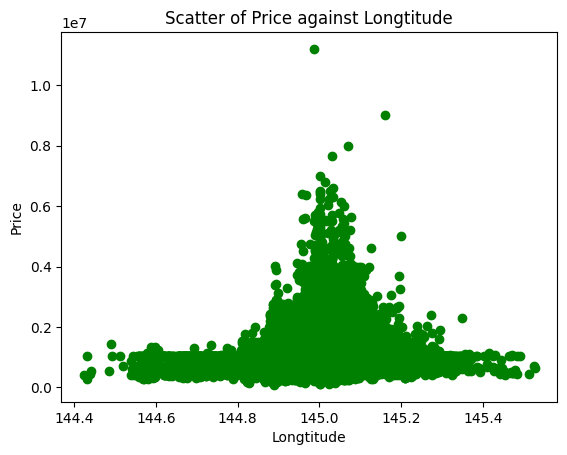

In [45]:
# using pyplot module in matplotlib
plt.scatter(v_housing['Longtitude'], v_housing['Price'], c = 'green')
plt.title('Scatter of Price against Longtitude')
plt.xlabel('Longtitude')
plt.ylabel('Price')
plt.show()

>Visualizing coleration of features and targets

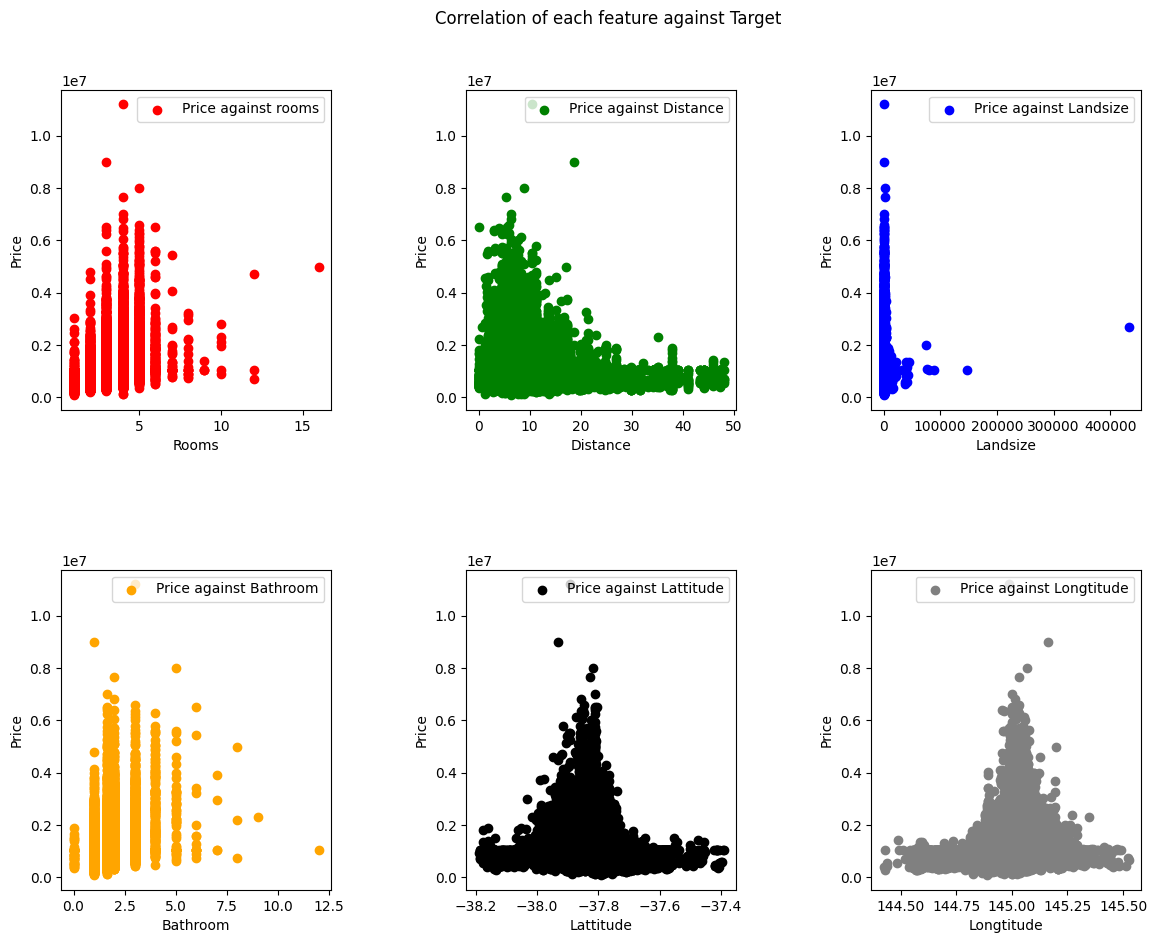

In [46]:
# Creatng grid of plots
fig, axs = plt.subplots(2, 3, figsize = (18, 10))

# Plotting each feature against target
axs[0, 0].scatter(v_housing['Rooms'], v_housing['Price'], label='Price against rooms', c = 'red')
axs[0, 1].scatter(v_housing['Distance'], v_housing['Price'], label='Price against Distance', c= 'green')
axs[0, 2].scatter(v_housing['Landsize'], v_housing['Price'], label='Price against Landsize', c = 'blue')
axs[1, 0].scatter(v_housing['Bathroom'], v_housing['Price'], label='Price against Bathroom', c = 'orange')
axs[1, 1].scatter(v_housing['Lattitude'], v_housing['Price'], label='Price against Lattitude', c = 'black')
axs[1, 2].scatter(v_housing['Longtitude'], v_housing['Price'], label='Price against Longtitude', c = 'grey')

# Set the title and axis labels
fig.suptitle('Correlation of each feature against Target', horizontalalignment = 'right')
axs[0, 0].set_xlabel('Rooms')
axs[0, 0].set_ylabel('Price')

axs[0, 1].set_xlabel('Distance')
axs[0, 1].set_ylabel('Price')

axs[0, 2].set_xlabel('Landsize')
axs[0, 2].set_ylabel('Price')

axs[1, 0].set_xlabel('Bathroom')
axs[1, 0].set_ylabel('Price')

axs[1, 1].set_xlabel('Lattitude')
axs[1, 1].set_ylabel('Price')

axs[1, 2].set_xlabel('Longtitude')
axs[1, 2].set_ylabel('Price')

# Adjust the spacing between the subplots
plt.subplots_adjust(left=0.1, right=0.7, bottom=0.1, top=0.9, wspace=0.5, hspace=0.5)

# Add a legend to each subplot
for ax in axs.flat:
    ax.legend()



# Show the plot
plt.show()

>Visualization of performance of Models on specifice dataset

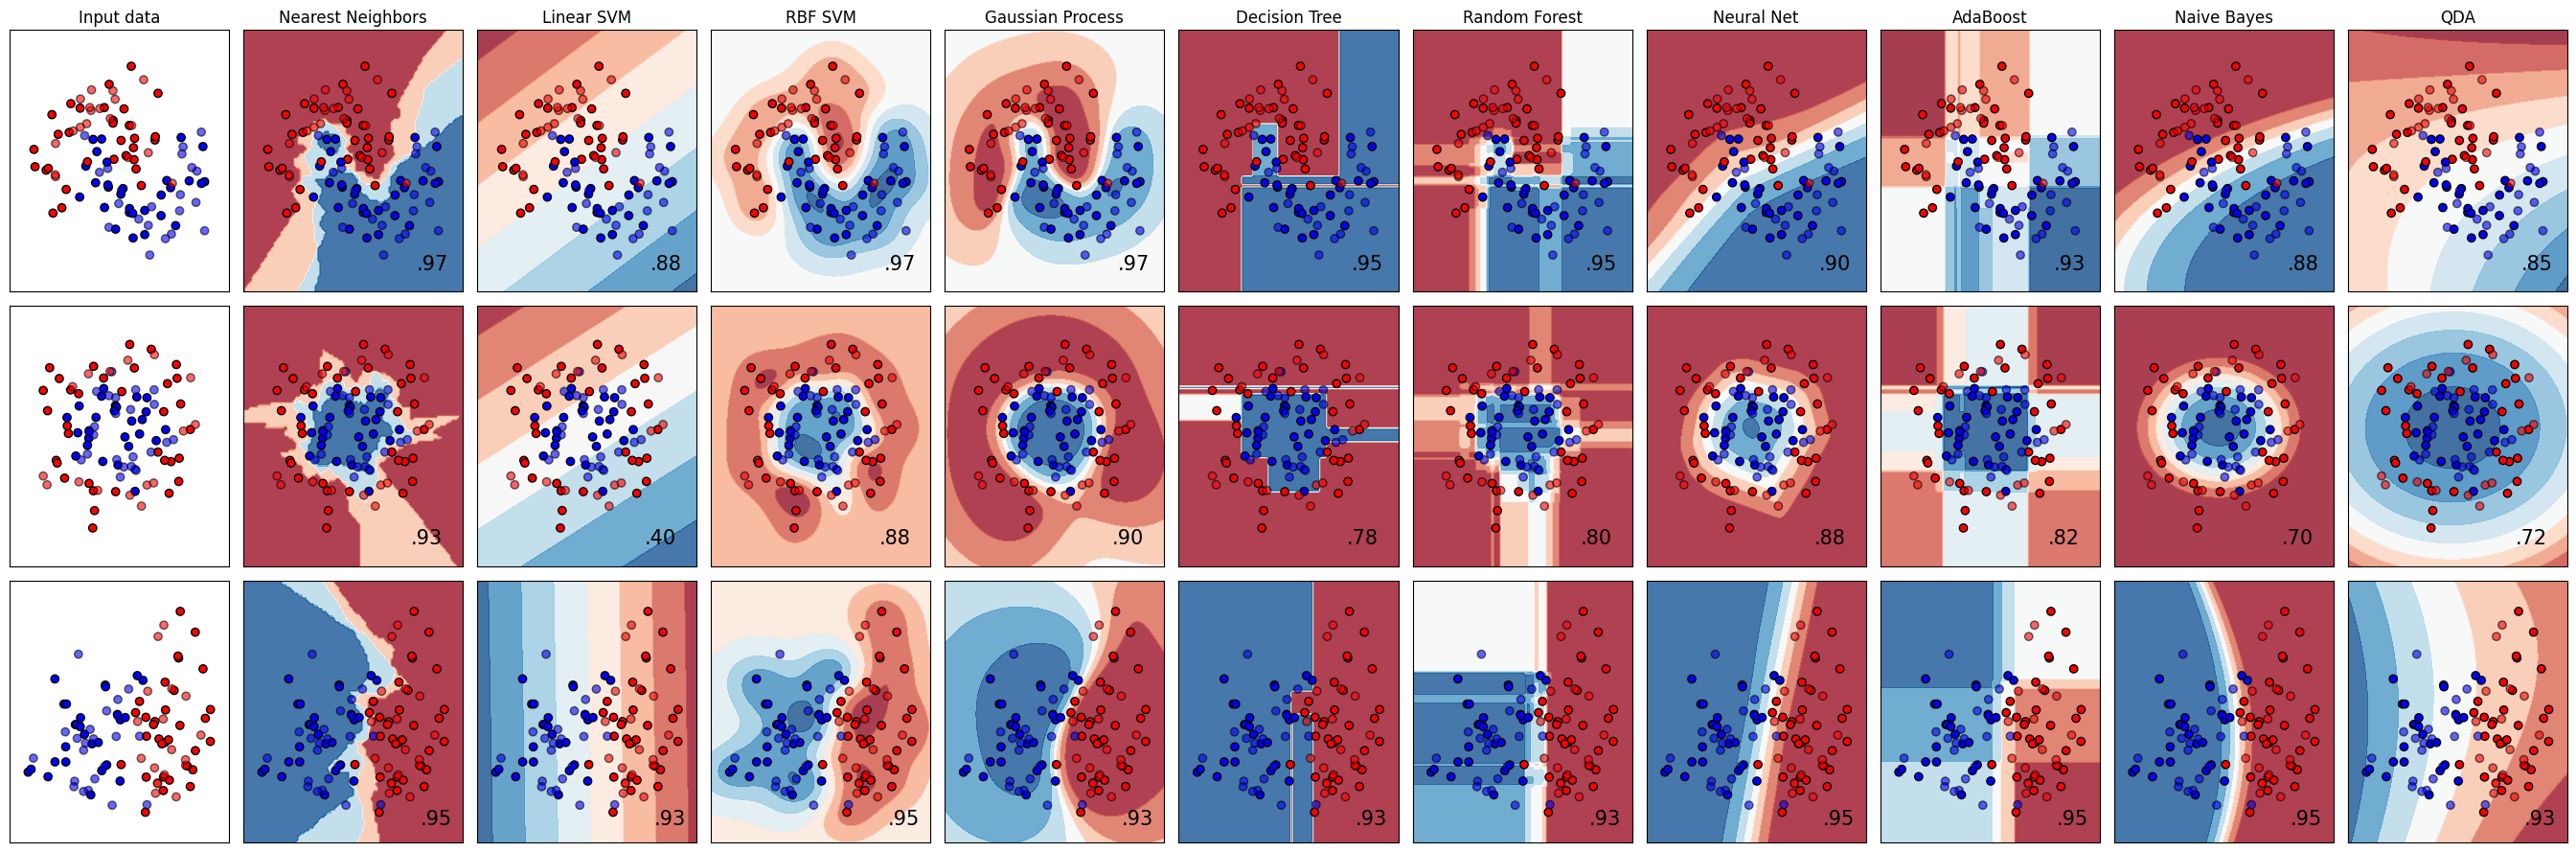

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

# Case Study

>Generating a simple classification model using iris dataset

In [32]:
from sklearn.datasets import load_wine
w_data = load_wine(as_frame = True)

# loading matrix of features and targets
X = w_data.data
y = w_data.target
X_v = X.copy()

X.head(10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0  
5                          2.85   1450.0  
6                          3.58   1290.0  
7                          3.58   1295.0  
8                          2.85   1045.0  
9                          3.55   1045.0

In [18]:
# normalizing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)



>Simple classification model

In [23]:
# developing a simple model
from sklearn.svm import SVC
svc = SVC(C = 1.0, kernel = 'rbf', gamma = 'scale')

# trainig the model
svc.fit(X_train, y_train)

# predicting
y_pred = svc.predict(X_test)


In [25]:
results = pd.DataFrame()
results['True'] = y_test
results['Predicted'] = y_pred
results[0:10]

True  Predicted
19      0          0
45      0          0
140     2          2
30      0          0
67      1          1
16      0          0
119     1          1
174     2          2
109     1          1
141     2          2

In [46]:
# Evaluation matrics
from sklearn.metrics import confusion_matrix, r2_score
r2_score = (r2_score(y_test, y_pred))  * 100
c_matrix = confusion_matrix(y_test, y_pred)
r2_score

96.26865671641791

In [47]:
c_matrix

array([[15,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 11]])

## Appendix

>Generating convariance matrices

In [59]:
from sklearn.covariance import EmpiricalCovariance

# creating the object
cov = EmpiricalCovariance()

# fitting on the data
cov.fit(X_train)

cov_matrix = cov.covariance_


In [ ]:
cov_matrix

>Dimentsion Reduction with Principle component analysis

In [38]:
w_data = w_data.data

In [39]:
w_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [40]:
# standardize the data
from sklearn.preprocessing import StandardScaler
w_scaler = StandardScaler()
w_data = w_scaler.fit_transform(w_data)

In [41]:
#component reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
decomp_data = pca.fit_transform(w_data)

In [ ]:
decomp_data

In [74]:
# viewing direction of maximum variance
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])